170500096/170498071 [==============================] - 17s 0us/step
Epoch 1/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.5199 - accuracy: 0.4435 - val_loss: 1.2696 - val_accuracy: 0.5477
Epoch 2/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.1619 - accuracy: 0.5877 - val_loss: 1.0655 - val_accuracy: 0.6256
Epoch 3/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0141 - accuracy: 0.6441 - val_loss: 1.0281 - val_accuracy: 0.6293
Epoch 4/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.9234 - accuracy: 0.6743 - val_loss: 0.9513 - val_accuracy: 0.6640
Epoch 5/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8533 - accuracy: 0.7022 - val_loss: 0.9596 - val_accuracy: 0.6631
Epoch 6/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8017 - accuracy: 0.7175 - val_loss: 0.9133 - val_accuracy: 0.6842
Epoch 7/10
1563/1563 [==============================] - 

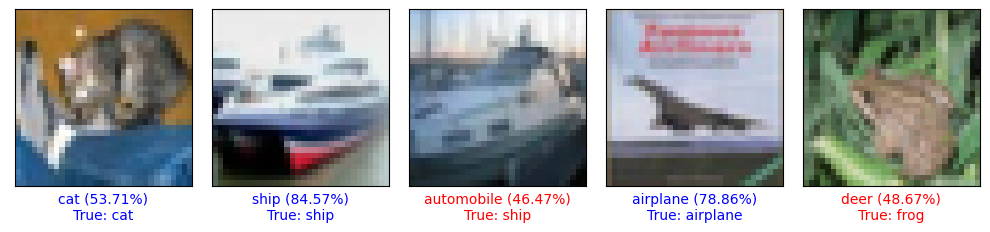

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# 1. Load CIFAR-10 Dataset (Preloaded in Keras)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 2. Normalize the Data (0 to 1 scale)
x_train, x_test = x_train / 255.0, x_test / 255.0

# 3. Class Names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 4. Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 classes
])

# 5. Compile the Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 6. Train the Model
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

# 7. Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.2f}")

# 8. Predict on Test Images
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

# 9. Show Sample Predictions
def plot_image(i, predictions_array, true_label, img):
    true_label, img = int(true_label[i]), img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"{class_names[predicted_label]} ({100*np.max(predictions_array):.2f}%)\nTrue: {class_names[true_label]}", color=color)

# Show first 5 test predictions
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plot_image(i, predictions[i], y_test, x_test)
plt.tight_layout()
plt.show()
